In [21]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from itertools import cycle
import time
from datetime import datetime

# colors
palette = cycle(px.colors.qualitative.Bold)
#palette = cycle(['black', 'grey', 'red', 'blue'])
palette = cycle(px.colors.qualitative.Set1)


games_df = pd.read_csv('games.csv')
games_df = games_df.loc[()].dropna()
games_df['Year_of_Release'] = games_df['Year_of_Release'].astype(int)

games_df['DateCount'] = games_df['Year_of_Release'].factorize()[0] + 1
games_df

,Name,Platform,Year_of_Release,Genre,Critic_Score,User_Score,Rating,DateCount
0,Wii Sports,Wii,2006,Sports,76.0,8,E,1
2,Mario Kart Wii,Wii,2008,Racing,82.0,8.3,E,2
3,Wii Sports Resort,Wii,2009,Sports,80.0,8,E,3
6,New Super Mario Bros.,DS,2006,Platform,89.0,8.5,E,1
7,Wii Play,Wii,2006,Misc,58.0,6.6,E,1
...,...,...,...,...,...,...,...,...
16699,Planet Monsters,GBA,2001,Action,67.0,tbd,E,10
16700,Breach,PC,2011,Shooter,61.0,5.8,T,11
16701,Bust-A-Move 3000,GC,2003,Puzzle,53.0,tbd,E,18
16702,Mega Brain Boost,DS,2008,Puzzle,48.0,tbd,E,2


In [65]:
{int(date) : {"label": str(date), "style": {"transform": "rotate(45deg)"}} for date, date in enumerate(sorted(games_df['Year_of_Release'].unique()))}

{1985: {'label': '1985', 'style': {'transform': 'rotate(45deg)'}},
 1988: {'label': '1988', 'style': {'transform': 'rotate(45deg)'}},
 1992: {'label': '1992', 'style': {'transform': 'rotate(45deg)'}},
 1994: {'label': '1994', 'style': {'transform': 'rotate(45deg)'}},
 1996: {'label': '1996', 'style': {'transform': 'rotate(45deg)'}},
 1997: {'label': '1997', 'style': {'transform': 'rotate(45deg)'}},
 1998: {'label': '1998', 'style': {'transform': 'rotate(45deg)'}},
 1999: {'label': '1999', 'style': {'transform': 'rotate(45deg)'}},
 2000: {'label': '2000', 'style': {'transform': 'rotate(45deg)'}},
 2001: {'label': '2001', 'style': {'transform': 'rotate(45deg)'}},
 2002: {'label': '2002', 'style': {'transform': 'rotate(45deg)'}},
 2003: {'label': '2003', 'style': {'transform': 'rotate(45deg)'}},
 2004: {'label': '2004', 'style': {'transform': 'rotate(45deg)'}},
 2005: {'label': '2005', 'style': {'transform': 'rotate(45deg)'}},
 2006: {'label': '2006', 'style': {'transform': 'rotate(45deg)

In [3]:
dt_df = games_df['Year_of_Release'].reset_index()
dt_df['Year_of_Release'] = sorted(pd.to_datetime(dt_df['Year_of_Release'], format='%Y'))
# dt_df['Year_of_Release'] = pd.to_datetime(dt_df['Year_of_Release'])
#dt_df['Year_of_Release'] = dt_df['Year_of_Release'].dt.year
# dt_df['Year_of_Release']

In [4]:
def unixTimeMillis(dt): #datetime changer for date range slider
    ''' Convert datetime to unix timestamp '''
    return int(time.mktime(dt.timetuple()))

def unixToDatetime(unix):
    ''' Convert unix timestamp to datetime. '''
    return pd.to_datetime(unix,unit='s')

def getMarks(start, end, Nth=100):
    ''' Returns the marks for labeling.
        Every Nth value will be used.
    '''
    result = {}
    for i, date in enumerate(dt_df['Year_of_Release']):
        if(i%Nth == 1):
            result[date.strftime('%Y')] = str(date.strftime('%Y'))
    return result

marks=getMarks(dt_df['Year_of_Release'].min(),dt_df['Year_of_Release'].max())
marks

{'1988': '1988',
 '2000': '2000',
 '2001': '2001',
 '2002': '2002',
 '2003': '2003',
 '2004': '2004',
 '2005': '2005',
 '2006': '2006',
 '2007': '2007',
 '2008': '2008',
 '2009': '2009',
 '2010': '2010',
 '2011': '2011',
 '2012': '2012',
 '2013': '2013',
 '2014': '2014',
 '2015': '2015',
 '2016': '2016'}

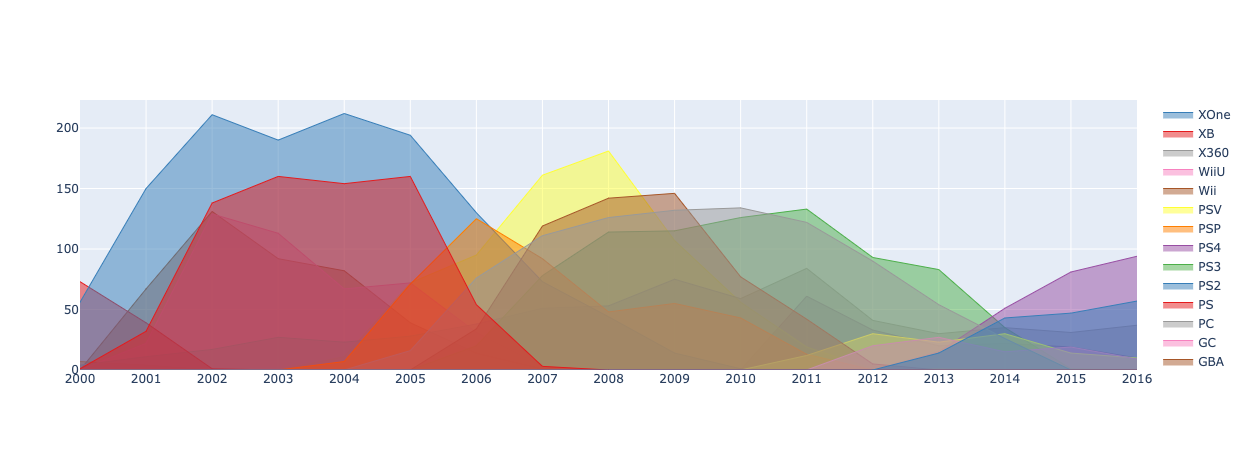

In [315]:
fig = go.Figure()

dff = games_df.groupby(["Year_of_Release","Platform"], as_index=False).size() 
df_res = dff.pivot(index='Platform', columns='Year_of_Release', values='size').fillna(0)
x = list(df_res.columns)

for i in range(len(df_res.index)):
    fig.add_trace(go.Scatter(
        name=df_res.index[i],
        x=x,
        y=list(df_res.iloc[i]),    
        mode='lines',
        line=dict(width=1, color=next(palette)),
        stackgroup=i,
    ))

f = fig.update_layout(
    showlegend=True,
    xaxis_type='category'
)

f